# Here is your task
The risk manager has collected data on the loan borrowers. The data is in tabular format, with each row providing details of the borrower, including their income, total loans outstanding, and a few other metrics. There is also a column indicating if the borrower has previously defaulted on a loan. You must use this data to build a model that, given details for any loan described above, will predict the probability that the borrower will default (also known as PD: the probability of default). Use the provided data to train a function that will estimate the probability of default for a borrower. Assuming a recovery rate of 10%, this can be used to give the expected loss on a loan.

You should produce a function that can take in the properties of a loan and output the expected loss.


You can explore any technique ranging from a simple regression or a decision tree to something more advanced. You can also use multiple methods and provide a comparative analysis.

In [3]:
# Load Libreries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import pyplot
from scipy.stats import norm
import datetime as dt

In [4]:
df= pd.read_csv(r"E:\JP mogan chase\1\Task 3 and 4_Loan_Data.csv")
df.head(7)

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
5,4661159,0,5376.886873,7189.121298,85529.84591,2,697,0
6,8291909,1,3634.057471,7085.980095,68691.57707,6,722,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [6]:
df.default.value_counts()

0    8149
1    1851
Name: default, dtype: int64

In [7]:
# customer id is not significant to determine a default, so drop this variable
df.drop('customer_id',inplace=True,axis =1)
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,0,5221.545193,3915.471226,78039.38546,5,605,0
1,5,1958.928726,8228.752520,26648.43525,2,572,1
2,0,3363.009259,2027.830850,65866.71246,4,602,0
3,0,4766.648001,2501.730397,74356.88347,5,612,0
4,1,1345.827718,1768.826187,23448.32631,6,631,0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score

In [9]:
print('Max fico score is',df.fico_score.max())
print('Min fico score is',df.fico_score.min())

Max fico score is 850
Min fico score is 408


****Creating groups for fico scores****

In [10]:
# create a list of our conditions
conditions = [
    (df['fico_score'] <= 450),
    (df['fico_score'] > 450) & (df['fico_score'] <= 550),
    (df['fico_score'] > 550) & (df['fico_score'] <= 650),
    (df['fico_score'] > 650) &(df['fico_score']<=750),
    (df['fico_score']>750)
    ]

# create a list of the values we want to assign for each condition
values = [0,1,2,3,4]

# create a new column and use np.select to assign values to it using our lists as arguments
df['fico_group'] = np.select(conditions, values)

In [11]:
df.fico_group.value_counts()

2    5049
3    3920
1     746
4     273
0      12
Name: fico_group, dtype: int64

In [12]:
print('maximum income is',df.income.max())
print('minimum income is',df.income.min())

maximum income is 148412.1805
minimum income is 1000.0


****Creting 6 groups for the variable income with a gap of 25000****

In [13]:
conditions = [(df['income']<=25000),(df['income']>=25000 ) & (df['income']<= 50000),(df['income'] >=50000) & 
              (df['income']<=75000), (df['income'] >=75000) & (df['income'] <=100000), (df['income'] >=100000)
              & (df['income'] <=125000), (df['income'] >= 125000) & (df['income'] <= 150000)]

#create a list of values
values = [0,1,2,3,4,5]
# crete a new column for iincome groups

df['income_group'] = np.select(conditions, values)

df.income_group.value_counts()

2    4333
3    3417
1    1457
4     622
0     138
5      33
Name: income_group, dtype: int64

In [14]:
df.head()
# the dataset after inserting 2 groups of columns

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default,fico_group,income_group
0,0,5221.545193,3915.471226,78039.38546,5,605,0,2,3
1,5,1958.928726,8228.752520,26648.43525,2,572,1,2,1
2,0,3363.009259,2027.830850,65866.71246,4,602,0,2,2
3,0,4766.648001,2501.730397,74356.88347,5,612,0,2,2
4,1,1345.827718,1768.826187,23448.32631,6,631,0,2,0


In [15]:
# we wont be taking in income and fico scores, instead we will be using the groups initiated
x = df[['credit_lines_outstanding','loan_amt_outstanding','total_debt_outstanding','years_employed',
      'fico_group','income_group']]
y= df[['default']]

In [16]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y,test_size= 0.7, random_state = 42)

In [17]:
from sklearn.linear_model import LogisticRegression

# initialise the model
logit = LogisticRegression(solver='lbfgs').fit(x_train,np.ravel(y_train))

## fitting the model with x and y variables



In [18]:
# predicting y variable with independent x variables
y_pred = logit.predict(x_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Text(0.5, 1, 'Confusion Matrix  | Logistic Regression  |')

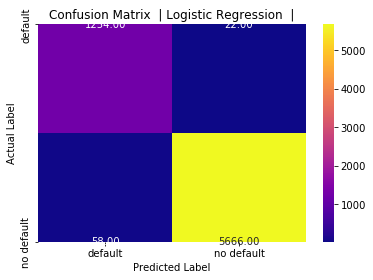

In [19]:
from sklearn import metrics


cm = metrics.confusion_matrix(y_test,y_pred, [1,0])
sns.heatmap(cm,annot=True,fmt='.2f',cmap='plasma'
           ,yticklabels=['default','no default'],
          xticklabels=['default','no default'])

plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix  | Logistic Regression  |")

In [20]:
report = metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5724
           1       0.96      0.98      0.97      1276

    accuracy                           0.99      7000
   macro avg       0.98      0.99      0.98      7000
weighted avg       0.99      0.99      0.99      7000



In [21]:
# Print the accuracy score the mod
print('Accuracy of the model is',logit.score(x_test,y_test))

Accuracy of the model is 0.9885714285714285


# AUC And ROC

In [22]:
# predicting the probability values for test cases

pred_prob_df  = pd.DataFrame(logit.predict_proba(x_test))
pred_prob_df .head()

,0,1
0,9.999996e-01,3.920786e-07
1,9.964174e-01,3.582625e-03
2,6.296791e-07,9.999994e-01
3,9.999999e-01,9.690321e-08
4,9.999990e-01,9.919873e-07


# Recall is the ability of the model to correctly classify positives and negatives, aka,  sensitivity and specificity respectively

# Precision is about being precise, i.e, how accurate our model is. In other words when a model makes a prediction, how often it is correct.

In [23]:
# store the 3 metrics in three different variables

accuracy  = metrics.accuracy_score(y_test,y_pred)
precision = metrics.precision_score(y_test,y_pred)
recall    = metrics.recall_score(y_test,y_pred)
note      = 'The above measure are only applicable for Positive class and not Negative \
Class, For Negtive class measures look at the classification report above'

print("Accuracy is",round(accuracy,2)*100,"%")
print('Precision is',round(precision,2)*100,'%')
print('Recall is',round(recall,2)*100,'%')
print(note)

Accuracy is 99.0 %
Precision is 96.0 %
Recall is 98.0 %
The above measure are only applicable for Positive class and not Negative Class, For Negtive class measures look at the classification report above


# Is this model acceptable for practical applications ?

To accept a model for practical applications, AUC score of atleat 0.7 is required. AUC is the area under the
curve of the Receiver operating characteristics curve. To find the AUC for the above model, we need to 
create a new dataframe and store the probability values for both the class labels 0, and 1. The model's
predict_proba() method gives the predicted probability for the test examples, and can be passed to 
roc_aur_score() along with actual class labels to obtain AUC score

In [24]:
# the dataframe will have two columns for probabilty values of , 0 and 1 

y_pred_probs = logit.predict_proba(x_test)[::,1]  # slice for taget class 1

# We are slicing this array to use probabilities for only the target class, 1

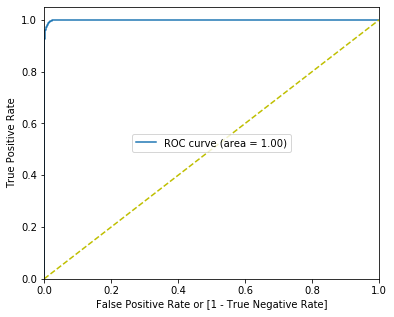

In [25]:

fpr,tpr,thresholds = metrics.roc_curve(y_test,y_pred_probs)  # Store fpr,tpr, and thresholds

auc = metrics.roc_auc_score(y_test,y_pred_probs)             # Store the auc score

plt.figure(figsize=(6, 5))
plt.plot(fpr,tpr,label= 'ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'y--')                               # Plot a diagonal line at 45 degrees
plt.xlim([0.0, 1.0])  
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="center")
plt.show()